# 7조 / 축구선수 연봉 예측 모델


## 데이터 전처리 : 모두 숫자열로
- right=0, left=1/
GK=0, ST=1 MF=2, DF=3/
africa=0, asia=1, europe=2, oceania=3, south america=4

- 오류처리 : train_y = train_y[:,:].astype(float) /
train_x = train_x[:,:].astype(float) 사용


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense  #(Dense)

# 제출한 3개의 csv파일을 드라이브에 올려주시길 바랍니다.
- 파일 저장 위치 : /content/drive/MyDrive/cau_temp/
- 수업 중에 사용한 폴더를 저장위치로 지정했습니다. 양해 부탁드립니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 파일 설명
FIFA_test.csv 파일 : 연봉을 예측할 선수들 / 
FIFA_train.csv 파일 : 학습할 파일 / submission.csv 파일 : FIFA_test 파일의 결과를 저장할 파일

In [ ]:
!cp '/content/drive/MyDrive/cau_temp/FIFA_test.csv' ./

In [ ]:
!cp '/content/drive/MyDrive/cau_temp/FIFA_train.csv' ./

In [ ]:

!cp '/content/drive/MyDrive/cau_temp/submission.csv' ./

In [ ]:
!ls -al

total 640
drwxr-xr-x 1 root root   4096 Aug 30 09:28 .
drwxr-xr-x 1 root root   4096 Aug 30 09:26 ..
drwxr-xr-x 4 root root   4096 Aug 25 13:35 .config
drwx------ 5 root root   4096 Aug 30 09:28 drive
-rw------- 1 root root 159571 Aug 30 09:28 FIFA_test.csv
-rw------- 1 root root 438463 Aug 30 09:28 FIFA_train.csv
drwxr-xr-x 1 root root   4096 Aug 25 13:35 sample_data
-r-------- 1 root root  31703 Aug 30 09:28 submission.csv


In [ ]:
!head FIFA_train.csv

name,id,continent,age,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
L. Messi,0,4,31,2021,1,1,5,94,94,4,110500000
De Gea,3,2,27,2020,0,0,4,91,93,1,72000000
L. Suárez,7,4,31,2021,1,0,5,91,91,3,80000000
Sergio Ramos,8,2,32,2020,0,0,4,91,91,3,51000000
J. Oblak,9,2,25,2021,0,0,3,90,93,1,68000000
D. Godín,12,4,32,2019,3,0,3,90,90,2,44000000
David Silva,13,2,32,2020,2,1,4,90,90,4,60000000
N. Kanté,14,2,27,2023,2,0,3,89,90,2,63000000
M. ter Stegen,18,2,26,2022,0,0,3,89,92,1,58000000


In [ ]:
invest=pd.read_csv('FIFA_train.csv')
invest.head()


,name,id,continent,age,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,L. Messi,0,4,31,2021,1,1,5,94,94,4,110500000
1,De Gea,3,2,27,2020,0,0,4,91,93,1,72000000
2,L. Suárez,7,4,31,2021,1,0,5,91,91,3,80000000
3,Sergio Ramos,8,2,32,2020,0,0,4,91,91,3,51000000
4,J. Oblak,9,2,25,2021,0,0,3,90,93,1,68000000


In [ ]:
invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              8932 non-null   object
 1   id                8932 non-null   int64 
 2   continent         8932 non-null   int64 
 3   age               8932 non-null   int64 
 4   contract_until    8932 non-null   int64 
 5   position          8932 non-null   int64 
 6   prefer_foot       8932 non-null   int64 
 7   reputation        8932 non-null   int64 
 8   stat_overall      8932 non-null   int64 
 9   stat_potential    8932 non-null   int64 
 10  stat_skill_moves  8932 non-null   int64 
 11  value             8932 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 837.5+ KB


In [ ]:
data=invest.to_numpy()
print(data.shape)
print(data[:5])

(8932, 12)
[['L. Messi' 0 4 31 2021 1 1 5 94 94 4 110500000]
 ['De Gea' 3 2 27 2020 0 0 4 91 93 1 72000000]
 ['L. Suárez' 7 4 31 2021 1 0 5 91 91 3 80000000]
 ['Sergio Ramos' 8 2 32 2020 0 0 4 91 91 3 51000000]
 ['J. Oblak' 9 2 25 2021 0 0 3 90 93 1 68000000]]


## 7443 = 전체 데이터 8932의 80% 지점

In [ ]:
np.random.shuffle(data)

x = data[:,1:11]
y = data[:,11:]

split_index = 7443

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(train_x[:5])
print(train_y[:5])
print(test_x[:5])
print(test_y[:5])

(7443, 10)
(7443, 1)
(1489, 10)
(1489, 1)
[[13026 0 19 2019 3 0 1 62 72 2]
 [12016 1 25 2021 2 0 1 63 68 2]
 [4347 4 34 2021 0 0 1 71 71 1]
 [15957 2 17 2021 3 0 1 55 73 2]
 [16582 2 19 2021 0 0 1 52 69 1]]
[[425000]
 [500000]
 [950000]
 [160000]
 [90000]]
[[13203 2 26 2019 0 0 1 61 63 1]
 [3477 0 33 2019 1 0 1 72 72 3]
 [12243 4 26 2019 1 0 1 63 64 2]
 [3835 2 23 2021 1 0 1 71 76 3]
 [1001 0 23 2020 2 0 1 77 81 3]]
[[210000]
 [2000000]
 [450000]
 [3200000]
 [10000000]]


In [ ]:
#normalization
min = np.min(y)
max = np.max(y)
y = (y-min) / (max-min)
print(np.min(y), np.max(y))

0.0 1.0


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import *

In [ ]:
print(train_x.shape)
print(train_x.shape[1])
print(train_y.shape)
print(train_y.shape[1])

(7443, 10)
10
(7443, 1)
1


In [ ]:
model = keras.Sequential([
    Dense(2000, activation='relu', input_shape=(train_x.shape[1],)),
    Dense(2000, activation='relu'),
    Dense(train_y.shape[1])
])
    

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2000)              22000     
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2001      
Total params: 4,026,001
Trainable params: 4,026,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mape'])

In [ ]:
type(train_x)

numpy.ndarray

In [ ]:
train_y = train_y[:,:].astype(float)
train_x = train_x[:,:].astype(float)

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

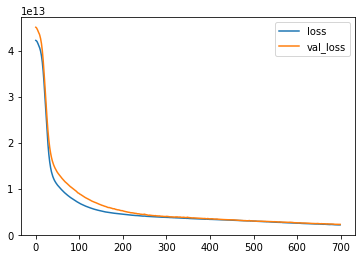

loss =  2133525790720.0 , val_loss =  2241257537536.0


In [ ]:
plot_losses = PlotLosses()
history = model.fit(train_x, train_y, epochs=700, verbose=1, batch_size=2048, validation_split=0.1,callbacks=[plot_losses])

In [ ]:
test_y = test_y[:,:].astype(float)
test_x = test_x[:,:].astype(float)

In [ ]:
loss, mape = model.evaluate(test_x, test_y, batch_size=2048)

print("loss :", loss)
print("mape :", mape)

1/1 [==============================] - 0s 23ms/step - loss: 1786467188736.0000 - mape: 487537.8438
loss : 1786467188736.0
mape : 487537.84375


In [ ]:
y_ = model.predict(test_x)
print(y_[:10])

[[  58360.297]
 [2325544.5  ]
 [ 137285.89 ]
 [3456736.   ]
 [9541124.   ]
 [ 100476.92 ]
 [ 958391.3  ]
 [ 202659.8  ]
 [5129088.   ]
 [ 173282.8  ]]



# FIFA_test 파일 예측
- 데이터 전처리 : FIFA_train.csv 와 동일하게 처리
- 결과를 submission 파일로 저장





In [ ]:
pay=pd.read_csv('FIFA_test.csv')
pay.head()

,name,id,continent,age,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,Cristiano Ronaldo,1,2,33,2022,1,0,5,94,94,5
1,Neymar Jr,2,4,26,2022,1,0,5,92,93,5
2,K. De Bruyne,4,2,27,2023,2,0,4,91,92,4
3,E. Hazard,5,2,27,2020,1,0,4,91,91,4
4,L. Modrić,6,2,32,2020,2,0,4,91,91,4


In [ ]:
data2=pay.to_numpy()
print(data2.shape)
print(data2[:5])


t = data2[:,1:]


print(t.shape)
print(t[:5])
print(t[:,0])

(3828, 11)
[['Cristiano Ronaldo' 1 2 33 2022 1 0 5 94 94 5]
 ['Neymar Jr' 2 4 26 2022 1 0 5 92 93 5]
 ['K. De Bruyne' 4 2 27 2023 2 0 4 91 92 4]
 ['E. Hazard' 5 2 27 2020 1 0 4 91 91 4]
 ['L. Modrić' 6 2 32 2020 2 0 4 91 91 4]]
(3828, 10)
[[1 2 33 2022 1 0 5 94 94 5]
 [2 4 26 2022 1 0 5 92 93 5]
 [4 2 27 2023 2 0 4 91 92 4]
 [5 2 27 2020 1 0 4 91 91 4]
 [6 2 32 2020 2 0 4 91 91 4]]
[1 2 4 ... 16932 16937 16943]


In [ ]:
t = t[:,:].astype(float)

In [ ]:
y_1 = model.predict(t)
print(y_1[:,0])

[6.0449004e+07 6.2899620e+07 6.0819124e+07 ... 8.6249266e+04 7.6454484e+04
 4.1497422e+04]


In [ ]:
(t[:,0])

array([1.0000e+00, 2.0000e+00, 4.0000e+00, ..., 1.6932e+04, 1.6937e+04,
       1.6943e+04])

In [ ]:
print(np.vstack((t[:,0],y_1[:,0])))

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 ... 1.69320000e+04
  1.69370000e+04 1.69430000e+04]
 [6.04490040e+07 6.28996200e+07 6.08191240e+07 ... 8.62492656e+04
  7.64544844e+04 4.14974219e+04]]


In [ ]:
raw_data=np.vstack((t[:,0],y_1[:,0])).T
data3=pd.DataFrame(raw_data[:],columns =['id','value'])

In [ ]:
data3.to_csv('submission.csv') 


In [ ]:
print(submission.csv)

submission.csv


In [ ]:
invest=pd.read_csv('submission.csv')
invest.head()

,Unnamed: 0,id,value
0,0,1.0,60449004.0
1,1,2.0,62899620.0
2,2,4.0,60819124.0
3,3,5.0,60596836.0
4,4,6.0,57660700.0
